#Format Data for Experiment in ABM environment

In [1]:
#Import Packages
#Needed for moving to output
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as pl
import itertools
from collections import Counter
import pickle

from vivarium.library.units import units, remove_units
from tumor_tcell.library.phylogeny import get_phylogeny
from tumor_tcell.experiments.main import plots_suite

Loading chipmunk for Linux (64bit) [/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/vivarium_env/lib/python3.8/site-packages/pymunk/libchipmunk.so]


In [2]:
#Read in the data from parent directory
analysis_dir = '/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/analysis/'
experiment_id = 'tumor_tcell_20210415.165209/'
experiment_dir = analysis_dir+experiment_id
os.chdir(experiment_dir)
os.getcwd()

'/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/analysis/tumor_tcell_20210415.165209'

In [3]:
file_to_read = open("data_export.pkl", "rb")
data = pickle.load(file_to_read)
data;

In [4]:
# #Plot the data using tumor-tcell experiment notebook and save in current directory
# bounds = [75,75]
figures_out_dir = experiment_dir + 'figures'
os.makedirs(figures_out_dir, exist_ok=True)
# fig1, fig2, fig3 = plots_suite(data, out_dir = figures_out_dir, bounds=[b*units.um for b in bounds])

#Convert ABM data output to pandas dataframe format

In [5]:
#Convert to initial dataframe
df_data = pd.DataFrame(data)


#Extract agents from the data
df_copy = df_data.copy()
df_agents = df_copy.iloc[0,:]
agents_dict = df_agents.to_dict()

#reformat the dictionary into mulitiindexed dataframe
reform_agents = {(level1_key, level2_key): values
          for level1_key, level2_dict in agents_dict.items()
          for level2_key, values in level2_dict.items()
          }
df_agents_exp1 = pd.DataFrame(reform_agents)
df_agents_multi = df_agents_exp1.T
names=['time', 'cell']
df_agents_multi.index.set_names(names, inplace=True)


#Subset only T cells from all agents
df_tcell_agents = df_agents_multi.iloc[df_agents_multi.index.get_level_values('cell').str.contains('tcell'), :]


#Subset categories and recombine in T cells
df_tcell_trans = df_tcell_agents.T
tcell_categories = []

#Extract each feature - boundary, internal, neighbors
for category in df_tcell_trans.index.values:
  df_boundary_sub = df_tcell_trans.loc[category,:]
  tcell_boundary_dict = df_boundary_sub.to_dict()
  df_boundary_sub2 = pd.DataFrame(tcell_boundary_dict)
  tcell_categories.append(df_boundary_sub2.T)

#concatenate dataframes
tcell_data = pd.concat(tcell_categories, axis=1)


#reformat T cell data for plotting
tcell_data['IFNg'] = tcell_data['external'].apply(lambda x: x.get('IFNg'))
tcell_data['transferable_cytotoxic_packets'] = tcell_data['transfer'].apply(lambda x: x.get('cytotoxic_packets'))
tcell_data['TCR'] = tcell_data['present'].apply(lambda x: x.get('TCR'))
tcell_data['X'] = tcell_data['location'].apply(lambda x: x[0])
tcell_data['Y'] = tcell_data['location'].apply(lambda x: x[1])

#Only select columns of interest
tcell_columns = ['cell_state', 'IFNg', 'TCR', 'velocity', 'transferable_cytotoxic_packets', 'X', 'Y']
tcell_data_form = tcell_data[tcell_columns]
tcell_data_form.index.set_names(names, inplace=True)

tcell_data_form

cell_state      IFNg    TCR                  velocity  \
time    cell                                                                
0.0     tcell_0           PD1p  0.000000  50000  10.0 micrometer / minute   
        tcell_1           PD1n  0.000000  50000  10.0 micrometer / minute   
        tcell_2           PD1n  0.000000  50000  10.0 micrometer / minute   
60.0    tcell_0           PD1p  0.997436  50000   0.0 micrometer / minute   
        tcell_1           PD1n  0.997436  50000   0.0 micrometer / minute   
...                        ...       ...    ...                       ...   
50400.0 tcell_1ABB        PD1n  0.000027  50000   0.0 micrometer / minute   
        tcell_2AA         PD1n  0.000027  50000   0.0 micrometer / minute   
        tcell_2AB         PD1n  0.000027  50000   0.0 micrometer / minute   
        tcell_1ABAA       PD1n  0.000027  50000   0.0 micrometer / minute   
        tcell_1ABAB       PD1n  0.000027  50000   0.0 micrometer / minute   

                     transferable_cytotoxic_packets  \
time    cell                                          
0.0     tcell_0                                 0.0   
        tcell_1                                 0.0   
        tcell_2                                 0.0   
60.0    tcell_0                                 0.0   
        tcell_1                                 0.0   
...                                             ...   
50400.0 tcell_1ABB                              0.0   
        tcell_2AA                               0.0   
        tcell_2AB                               0.0   
        tcell_1ABAA                             0.0   
        tcell_1ABAB                             0.0   

                                                 X  \
time    cell                                         
0.0     tcell_0      29.700695344117868 micrometer   
        tcell_1       21.15733761002662 micrometer   
        tcell_2      28.901564380051088 micrometer   
60.0    tcell_0       26.35000000149012 micrometer   
        tcell_1      18.540110651229465 micrometer   
...                                            ...   
50400.0 tcell_1ABB   29.491338571275026 micrometer   
        tcell_2AA     23.18967616690053 micrometer   
        tcell_2AB     27.54843950296285 micrometer   
        tcell_1ABAA  27.885163751535675 micrometer   
        tcell_1ABAB    27.6444188704856 micrometer   

                                                 Y  
time    cell                                        
0.0     tcell_0      15.734868045097201 micrometer  
        tcell_1       17.12100003120723 micrometer  
        tcell_2      28.887399376242758 micrometer  
60.0    tcell_0       5.374918223986101 micrometer  
        tcell_1       5.463852644612405 micrometer  
...                                            ...  
50400.0 tcell_1ABB   15.681963593859582 micrometer  
        tcell_2AA     26.35000000149012 micrometer  
        tcell_2AB    22.143389200643426 micrometer  
        tcell_1ABAA  3.0756659620041185 micrometer  
        tcell_1ABAB   8.493867921194715 micrometer  

[3831 rows x 7 columns]

In [6]:
####Extract death log statistics
df_death = df_copy.iloc[1,:]
death_dict = df_death.to_dict()

#reformat the dictionary into mulitiindexed dataframe
reform_death = {(level1_key, level2_key): values
          for level1_key, level2_dict in death_dict.items()
          for level2_key, values in level2_dict.items()}

#Make dataframe
df_death_exp1 = pd.DataFrame(reform_death)
df_death_multi = df_death_exp1.T
names=['time', 'cell']
df_death_multi.index.set_names(names, inplace=True)
df_death_multi.columns = ['time', 'death']

#subset only where death is not equal to false
df_death_sub = df_death_multi[~(df_death_multi['death'] == False)]

#Only get the final log of the death than contains all the death information
df_last_death = df_death_sub.loc[df_death_sub.index.levels[0][-1]]

#Subset only T cells from all agents
df_tcell_death = df_last_death.iloc[df_last_death.index.get_level_values('cell').str.contains('tcell'), :]
df_tumor_death = df_last_death.iloc[df_last_death.index.get_level_values('cell').str.contains('tumor'), :]



##Do for T cells
#sort deaths by time
df_tcell_death.sort_values(by=['time'], inplace=True)

#Get different death groupings and count total over time
death_types_list = list(df_tcell_death['death'].unique())
for death_type in death_types_list:
  df_tcell_death[death_type] = df_tcell_death['death'].apply(lambda x: 1 if x==death_type else 0)
  df_tcell_death['total_'+str(death_type)] = df_tcell_death[death_type].cumsum()

#get total death count over time
total_col_t = [col for col in df_tcell_death.columns if 'total' in col]
df_tcell_death['total_death'] = df_tcell_death[total_col_t].sum(axis = 1)


##Do for Tumors
#sort deaths by time
df_tumor_death.sort_values(by=['time'], inplace=True)

#Get different death groupings and count total over time
death_types_list = list(df_tumor_death['death'].unique())
for death_type in death_types_list:
  df_tumor_death[death_type] = df_tumor_death['death'].apply(lambda x: 1 if x==death_type else 0)
  df_tumor_death['total_'+str(death_type)] = df_tumor_death[death_type].cumsum()

#get total death count over time
total_col = [col for col in df_tumor_death.columns if 'total' in col]
df_tumor_death['total_death'] = df_tumor_death[total_col].sum(axis = 1)

df_tumor_death;

<ipython-input-6-6c37bd279b4c>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tumor_death.sort_values(by=['time'], inplace=True)


In [7]:
#Subset only Tumor cells from all agents
df_tumor_agents = df_agents_multi.iloc[df_agents_multi.index.get_level_values('cell').str.contains('tumor'), :]


#Subset categories and recombine in Tumor cells
df_tumor_trans = df_tumor_agents.T
tumor_categories = []

#Extract each feature - boundary, internal, neighbors
for category in df_tumor_trans.index.values:
  df_boundary_sub = df_tumor_trans.loc[category,:]
  tumor_boundary_dict = df_boundary_sub.to_dict()
  df_boundary_sub2 = pd.DataFrame(tumor_boundary_dict)
  tumor_categories.append(df_boundary_sub2.T)

#concatenate dataframes
tumor_data = pd.concat(tumor_categories, axis=1)
tumor_data;

#reformat Tumor cell data for plotting
tumor_data['IFNg'] = tumor_data['external'].apply(lambda x: x.get('IFNg'))
tumor_data['cytotoxic_packets'] = tumor_data['receive'].apply(lambda x: x.get('cytotoxic_packets'))
tumor_data['TCR_neighbor'] = tumor_data['accept'].apply(lambda x: x.get('TCR'))
tumor_data['X'] = tumor_data['location'].apply(lambda x: x[0])
tumor_data['Y'] = tumor_data['location'].apply(lambda x: x[1])
tumor_data.columns

#Only select columns of interest
tumor_columns = ['cell_state', 'IFNg', 'TCR_neighbor', 'cytotoxic_packets', 'X', 'Y']
tumor_data_form = tumor_data[tumor_columns]
tumor_data_form.index.set_names(names, inplace=True)

tumor_data_form

cell_state      IFNg  TCR_neighbor  cytotoxic_packets  \
time    cell                                                            
0.0     tumor_0      PDL1n  0.000000           0.0                0.0   
        tumor_1      PDL1n  0.000000           0.0                0.0   
        tumor_2      PDL1n  0.000000           0.0                0.0   
60.0    tumor_0      PDL1n  0.997436       50000.0                0.0   
        tumor_1      PDL1n  0.997436           0.0                0.0   
...                    ...       ...           ...                ...   
50340.0 tumor_1      PDL1n  0.000027       50000.0                0.0   
        tumor_2      PDL1n  0.000027      350000.0                0.0   
50400.0 tumor_0      PDL1n  0.000027       50000.0                0.0   
        tumor_1      PDL1n  0.000027       50000.0                0.0   
        tumor_2      PDL1n  0.000027      350000.0                0.0   

                                             X                              Y  
time    cell                                                                   
0.0     tumor_0   8.631013440824889 micrometer   6.156635255635826 micrometer  
        tumor_1  16.361502640321646 micrometer  27.545959333887684 micrometer  
        tumor_2  22.529429741121298 micrometer  20.177426716195118 micrometer  
60.0    tumor_0   7.559499231650993 micrometer   7.400001610729659 micrometer  
        tumor_1   9.274296847333856 micrometer   22.60000000149013 micrometer  
...                                        ...                            ...  
50340.0 tumor_1   6.491810469925031 micrometer  23.005494264981934 micrometer  
        tumor_2   19.14010379684904 micrometer  15.091645931599096 micrometer  
50400.0 tumor_0   6.755553517885749 micrometer    7.30588783473934 micrometer  
        tumor_1   6.351296654880101 micrometer  22.984141724235613 micrometer  
        tumor_2  19.001250101632195 micrometer   15.61770577297416 micrometer  

[2523 rows x 6 columns]

In [8]:
#phylogeny plot?

#Plotting the Data from the Experiment

In [9]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

pl.rc('font', size=SMALL_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [10]:
os.chdir(figures_out_dir)

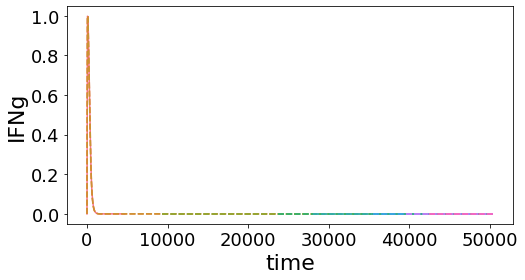

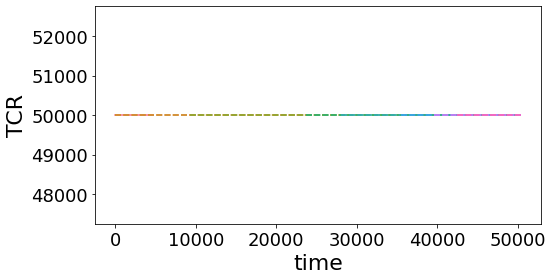

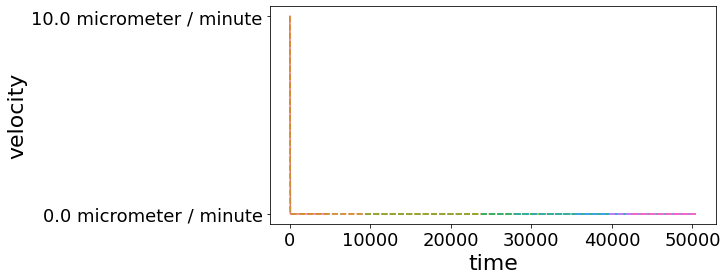

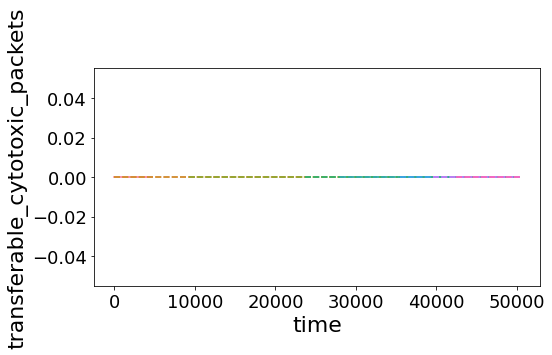

In [11]:
#reset index for plotting
tcell_plot = tcell_data_form.reset_index()
# plot the data to analyze
plotting_columns = ['IFNg', 'TCR', 'velocity', 'transferable_cytotoxic_packets']
for column in plotting_columns:
    pl.figure(figsize=(8, 4))
    column_1 = sns.lineplot(data=tcell_plot, x="time", y=column, style = 'cell_state', hue="cell", legend = None)
    pl.savefig(column+'_t_cell.png', format='png', bbox_inches='tight', dpi=300)

In [12]:
#How to extract individual T cells
df_divide_T = tcell_plot.drop_duplicates('cell', keep='first')

#Get unique agent IDs
unique_T_cell = list(df_divide_T.cell.unique())

#run phylogeny function
phylogeny_T = get_phylogeny(unique_T_cell)

# get initial ancestors, daughters, and mothers
daughters_T = list(phylogeny_T.values())
daughters_T = set([item for sublist in daughters_T for item in sublist])
descendents_T = list(daughters_T)
mothers_T = set(list(phylogeny_T.keys()))
ancestors_T = list(mothers_T - daughters_T)
ancestors_T;

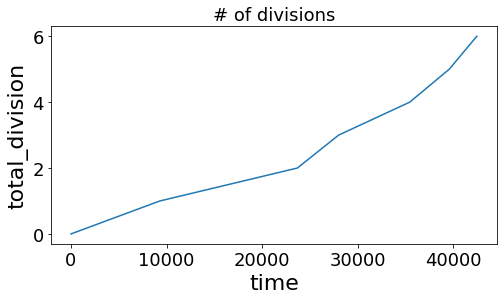

In [13]:
#Time for plotting cell divisions
div_list_T = []
for cell in descendents_T:
  div = df_divide_T[df_divide_T["cell"] == cell]['time'].min()
  div_list_T.append(div)

#get unique counts from the list
div_counts_T = Counter(div_list_T)
divide_time_T = pd.DataFrame.from_dict(div_counts_T, orient='index').reset_index()

#convert to dataframe
column_names = ['time', 'counts']
divide_time_T.columns = column_names

#divide counts by 2 because each daughter and original cell is counted twice
divide_time_T['counts'] = divide_time_T['counts'] / 2

#add 0, 0 initial point
divide_time_T.loc[-1] = [0, 0]
divide_time_T.index = divide_time_T.index + 1  # shifting index
divide_time_T = divide_time_T.sort_values(by = 'time') 

#accumulate the counts as progresses
divide_time_T['total_division'] = divide_time_T.counts.cumsum()

pl.figure(figsize=(8, 4))
div_cell_T = sns.lineplot(data=divide_time_T, x="time", y='total_division')

pl.title("# of divisions")
pl.savefig('tcell_division.png', format='png', bbox_inches='tight', dpi=300)

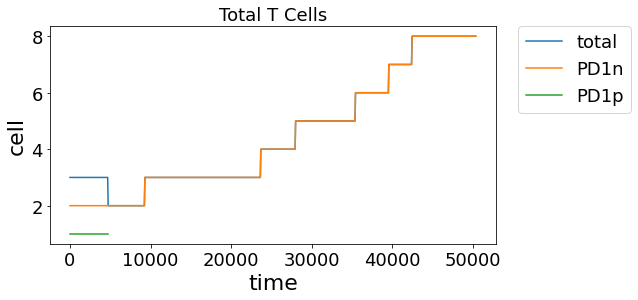

In [14]:
#Plot total cells and see how changing over time
total_tcell = tcell_plot.groupby('time')['cell'].nunique().reset_index()
tcell_state = tcell_plot.groupby(['time','cell_state'])['cell'].nunique().reset_index()
total_PD1n = tcell_state.loc[tcell_state['cell_state']=='PD1n']
total_PD1p = tcell_state.loc[tcell_state['cell_state']=='PD1p']

pl.figure(figsize=(8, 4))
ttl_tcell = sns.lineplot(data=total_tcell, x="time", y='cell', label = 'total')
ttl_PD1n = sns.lineplot(data=total_PD1n, x="time", y='cell', label = 'PD1n')
ttl_PD1p = sns.lineplot(data=total_PD1p, x="time", y='cell', label = 'PD1p')

pl.title("Total T Cells")
pl.legend(title="Cell type")
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.savefig('tcell_total.png', format='png', bbox_inches='tight', dpi=300)

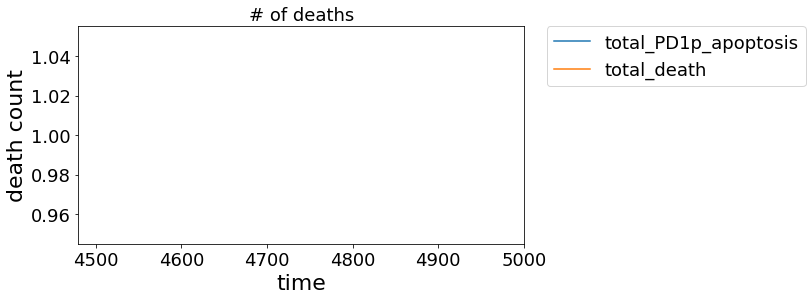

In [15]:
#Plot total number of deaths and type
total_col_t = [col for col in df_tcell_death.columns if 'total' in col]
pl.figure(figsize=(8, 4))
death_plot_t = pd.melt(df_tcell_death, id_vars= ['death', 'time'], value_vars= total_col_t)
death_plot_t.rename(columns={'variable':'death type', 'value' : 'death count'}, inplace=True)
death_cell_T = sns.lineplot(data=death_plot_t, x="time", y='death count', hue='death type')
pl.title("# of deaths")
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.savefig('tcell_death.png', format='png', bbox_inches='tight', dpi=300)

In [16]:
# #Spatial
# pl.figure(figsize=(10, 10))
# XandY = sns.lineplot(data=tcell_plot, x="X", y="Y", style = 'cell_state', hue="cell", legend = None)

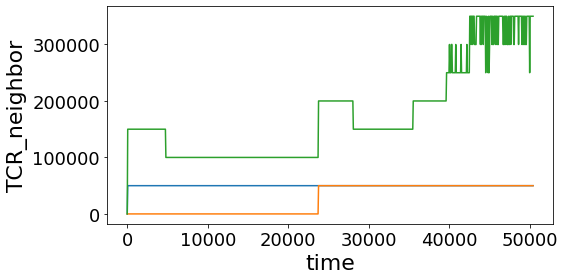

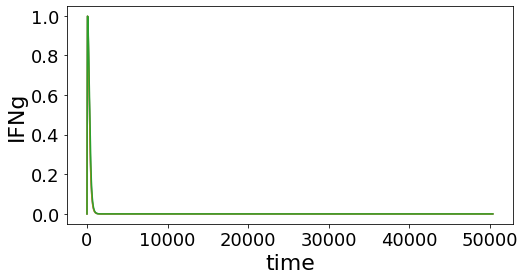

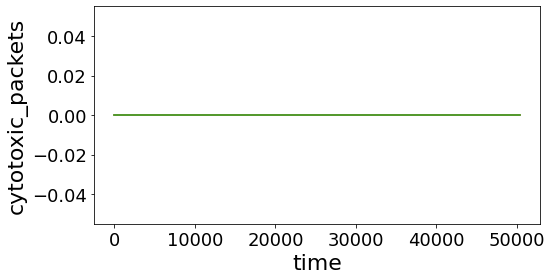

In [17]:
#reset index for plotting
tumor_plot = tumor_data_form.reset_index()

# plot the data to analyze
plotting_columns = ['TCR_neighbor', 'IFNg', 'cytotoxic_packets']
for column in plotting_columns:
    pl.figure(figsize=(8, 4))
    column_1 = sns.lineplot(data=tumor_plot, x="time", y=column, style = 'cell_state', hue="cell", legend = None)
    pl.savefig(column+'_tumor.png', format='png', bbox_inches='tight', dpi=300)

In [18]:
#How to extract individual tumor cells
df_divide_tumor = tumor_plot.drop_duplicates('cell', keep='first')

#Get unique agent IDs
unique_tumor_cell = list(df_divide_tumor.cell.unique())

#run phylogeny function
phylogeny_tumor = get_phylogeny(unique_tumor_cell)

# get initial ancestors, daughters, and mothers
daughters_tumor = list(phylogeny_tumor.values())
daughters_tumor = set([item for sublist in daughters_tumor for item in sublist])
descendents_tumor = list(daughters_tumor)
mothers_tumor = set(list(phylogeny_tumor.keys()))
ancestors_tumor = list(mothers_tumor - daughters_tumor)
descendents_tumor;

In [19]:
#Time for plotting cell divisions
div_list_tumor = []
for cell in descendents_tumor:
  div = df_divide_tumor[df_divide_tumor["cell"] == cell]['time'].min()
  div_list_tumor.append(div)

#get unique counts from the list
div_counts_tumor = Counter(div_list_tumor)
divide_time_tumor = pd.DataFrame.from_dict(div_counts_tumor, orient='index').reset_index()

#convert to dataframe
column_names = ['time', 'counts']
divide_time_tumor.columns = column_names

#divide counts by 2 because each daughter and original cell is counted twice
divide_time_tumor['counts'] = divide_time_tumor['counts'] / 2

#add 0, 0 initial point
divide_time_tumor.loc[-1] = [0, 0]
divide_time_tumor.index = divide_time_tumor.index + 1  # shifting index
divide_time_tumor = divide_time_tumor.sort_values(by = 'time') 

#accumulate the counts as progresses
divide_time_tumor['total_division'] = divide_time_tumor.counts.cumsum()

pl.figure(figsize=(8, 4))
div_cell_tumor = sns.lineplot(data=divide_time_tumor, x="time", y='total_division')

pl.title("# of divisions")
pl.savefig('tumor_division.png', format='png', bbox_inches='tight', dpi=300)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

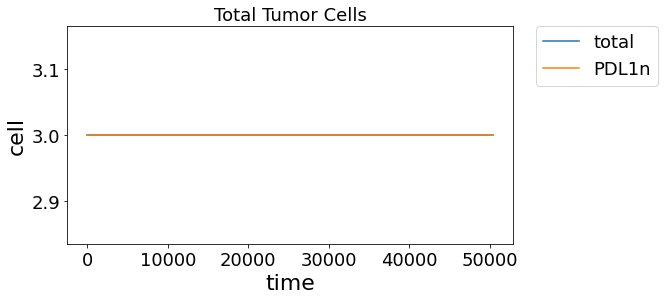

In [20]:
#Plot total cells and see how changing over time
total_tumor = tumor_plot.groupby('time')['cell'].nunique().reset_index()
tumor_state = tumor_plot.groupby(['time','cell_state'])['cell'].nunique().reset_index()
total_PDL1n = tumor_state.loc[tumor_state['cell_state']=='PDL1n']
total_PDL1p = tumor_state.loc[tumor_state['cell_state']=='PDL1p']

pl.figure(figsize=(8, 4))
ttl_tumorcell = sns.lineplot(data=total_tumor, x="time", y='cell', label = 'total')
ttl_PDL1n = sns.lineplot(data=total_PDL1n, x="time", y='cell', label = 'PDL1n')
ttl_PDL1p = sns.lineplot(data=total_PDL1p, x="time", y='cell', label = 'PDL1p')

pl.title("Total Tumor Cells")
pl.legend(title="Cell type")
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.savefig('tumor_total.png', format='png', bbox_inches='tight', dpi=300)

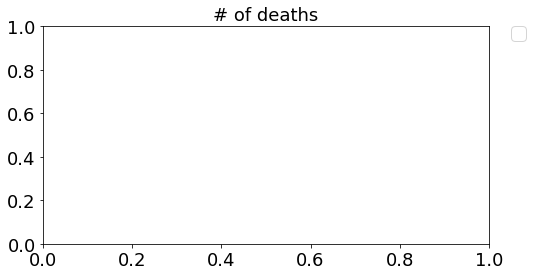

In [21]:
#Plot total number of deaths and type
total_col = [col for col in df_tumor_death.columns if 'total' in col]
pl.figure(figsize=(8, 4))
death_plot = pd.melt(df_tumor_death, id_vars= ['death', 'time'], value_vars= total_col)
death_plot.rename(columns={'variable':'death type', 'value' : 'death count'}, inplace=True)
death_cell = sns.lineplot(data=death_plot, x="time", y='death count', hue='death type')
pl.title("# of deaths")
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.savefig('tumor_death.png', format='png', bbox_inches='tight', dpi=300)

#Spatial Widget

In [22]:
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
# %matplotlib inline

# def plot_func(time):
#     x = tcell_plot[tcell_plot['time']<=time]['X']
#     y = tcell_plot[tcell_plot['time']<=time]['Y']
#     data_t = tcell_plot[tcell_plot['time']<=time]
#     xandy = sns.lineplot(data=data_t, x=x, y=y, hue = 'cell_state', style = 'cell', legend = None)
#     pl.show()

# interact(plot_func, time = widgets.FloatSlider(value=0,
#                                                min=0,
#                                                max=10000,
#                                                step=60))

In [25]:
tcell_plot.X.min()

'15.107203502120036 micrometer'

In [26]:
tcell_plot.Y.min()

'1.5747838844981135 micrometer'

In [ ]:
#tcell_plot.to_csv(ROOT + '/My Drive/Research/TNT/ABM_CODEX/Scripts_Data/'+'tcell_neg_data.csv')

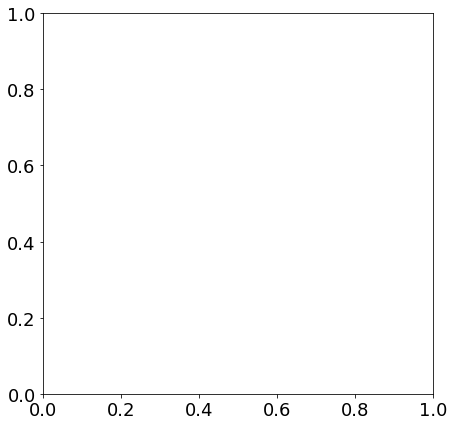

In [24]:
#Animated scatter plot trial
from matplotlib.animation import FuncAnimation
fig, ax = pl.subplots(figsize = (7, 7))

def animate(i):
    ax.cla()
    time1 = i * 60
    sns.scatterplot(x = 'X',
                    y = 'Y',
                    data = tcell_plot[tcell_plot.time == time1],
                    hue = 'cell_state',
                    ax = ax,
                    alpha = 0.7,)
    ax.set_title(f'Seconds {time1}')

ani = FuncAnimation(fig = fig, func = animate, frames = len(tcell_plot.time.unique()), interval = 60)
pl.show()
#ani.save('animation.mp4')

In [ ]:
#Or try this
fig, ax = pl.subplots()
scatters = []
for g,d in tips.groupby('smoker'):
    s = ax.scatter(x="total_bill", y="tip", data=tips, label=g)
    scatters.append(s)
ax.legend(bbox_to_anchor=(1.,1.), loc=1)
txt = ax.text(0.1,0.9,'frame=0', transform=ax.transAxes)

def animate(i):
    for c in scatters:
        x = np.random.random(size=(50,1))*50
        y = np.random.random(size=(50,1))*10
        xy = np.hstack([x,y])
        c.set_offsets(xy)
    txt.set_text('frame={:d}'.format(i))
    return scatters+[txt]

ani = animation.FuncAnimation(fig, animate, frames=10, blit=True)